# Hypothèse : Les films plus longs reçoivent des notes d'utilisateurs plus élevées que les films plus courts.

#### Importation des bibliothèques nécessaires

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Chargement des données

In [18]:
# Les chemins vers les fichiers CSV
fichier_ratings = 'data/ratings.csv'
fichier_movie = 'data/movies_metadata.csv'

# Lecture des fichiers CSV
data_ratings = pd.read_csv(fichier_ratings, sep=',', encoding='latin-1', low_memory=False)
data_movie = pd.read_csv(fichier_movie, sep=',', encoding='latin-1', low_memory=False)

## Aperçu des données

In [19]:
print("Aperçu des données Ratings :")
data_ratings.head()

Aperçu des données Ratings :


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [20]:
print("\nAperçu des données Movies :")
data_movie.head()


Aperçu des données Movies :


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Nettoyage et préparation des données

In [22]:
data = data_movie[["revenue",'vote_count']]

# Suppression des valeurs manquantes
data = data.dropna()
data = data[(data['revenue'] > 0) & (data['vote_count'] > 0)]
data.head()

,revenue,vote_count
0,373554033.0,5415.0
1,262797249.0,2413.0
3,81452156.0,34.0
4,76578911.0,173.0
5,187436818.0,1886.0


In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_

pca_optimal = PCA(n_components=2)
pca_optimal_result = pca_optimal.fit_transform(data_scaled)

Contribution des variables aux composantes principales :
               revenue  vote_count
Composante 1  0.707107    0.707107
Composante 2 -0.707107    0.707107


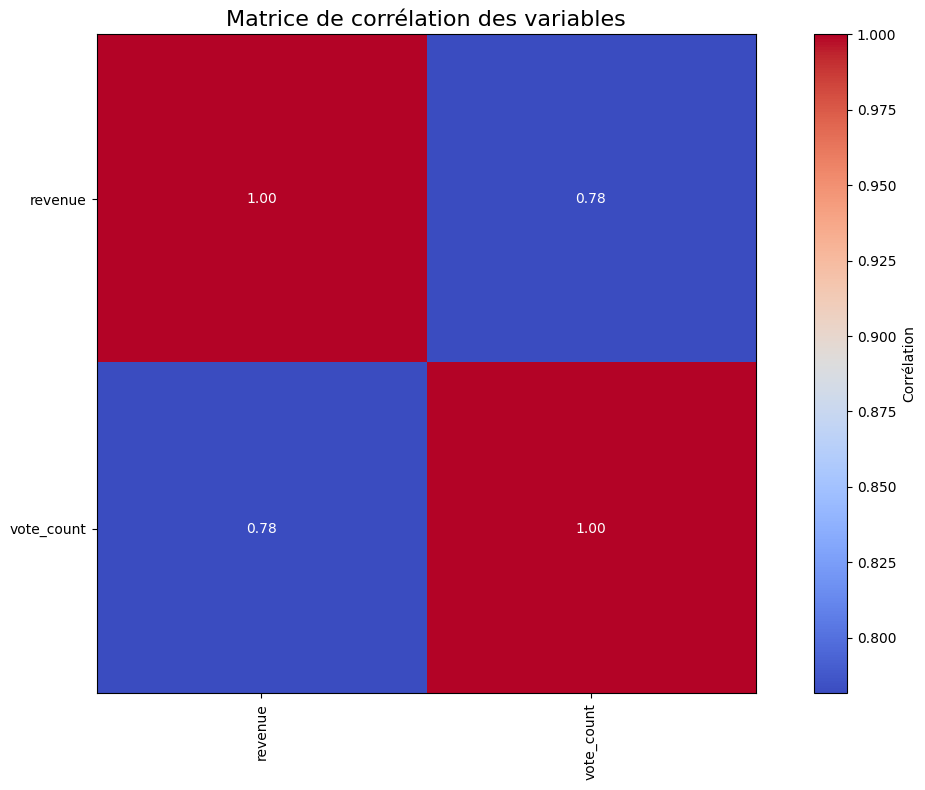

Matrice de corrélation :
             revenue  vote_count
revenue     1.000000    0.781538
vote_count  0.781538    1.000000


In [24]:
components_contribution = pd.DataFrame(
    pca_optimal.components_,
    columns=data.columns,
    index=[f"Composante {i+1}" for i in range(2)]
)

print("Contribution des variables aux composantes principales :")
print(components_contribution)

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Corrélation')
plt.title('Matrice de corrélation des variables', fontsize=16)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black' if abs(correlation_matrix.iloc[i, j]) < 0.5 else 'white')

plt.show()

print("Matrice de corrélation :")
print(correlation_matrix)

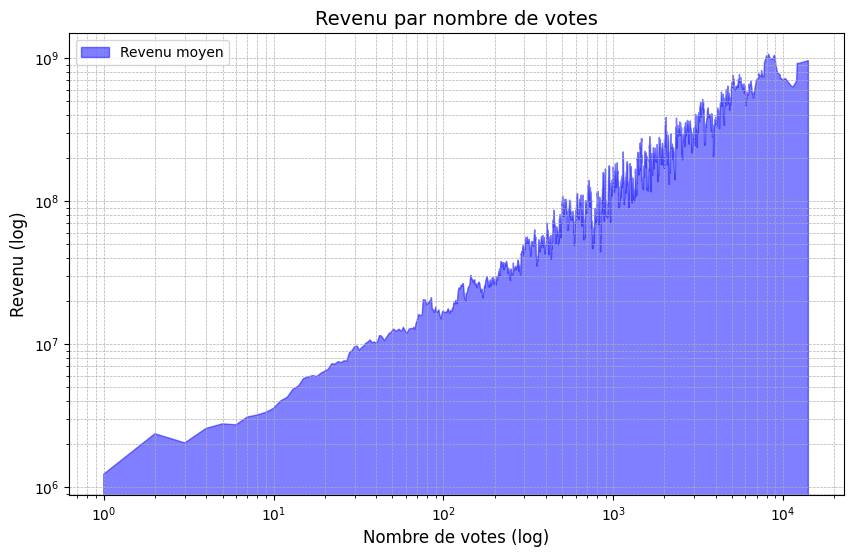

In [33]:
data = data.dropna(subset=['vote_count', 'revenue'])

# Plot the graph
# Aggregating data: calculating average revenue for each vote count
aggregated_data = data.groupby('vote_count')['revenue'].mean().reset_index()
aggregated_data = aggregated_data.sort_values(by='vote_count')

# Plotting the line graph
# Area plot
aggregated_data['smoothed_revenue'] = aggregated_data['revenue'].rolling(window=10, min_periods=1).mean()

# Plot the smoothed area plot
plt.figure(figsize=(10, 6))
plt.fill_between(aggregated_data['vote_count'], aggregated_data['smoothed_revenue'], color='blue', alpha=0.5, label='Revenu moyen')
plt.xscale('log')
plt.yscale('log')
plt.title('Revenu par nombre de votes', fontsize=14)
plt.xlabel('Nombre de votes (log)', fontsize=12)
plt.ylabel('Revenu (log)', fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.show()




C:\Users\risto\AppData\Local\Temp\ipykernel_4072\4119817597.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('vote_count_bin')['revenue'].mean()


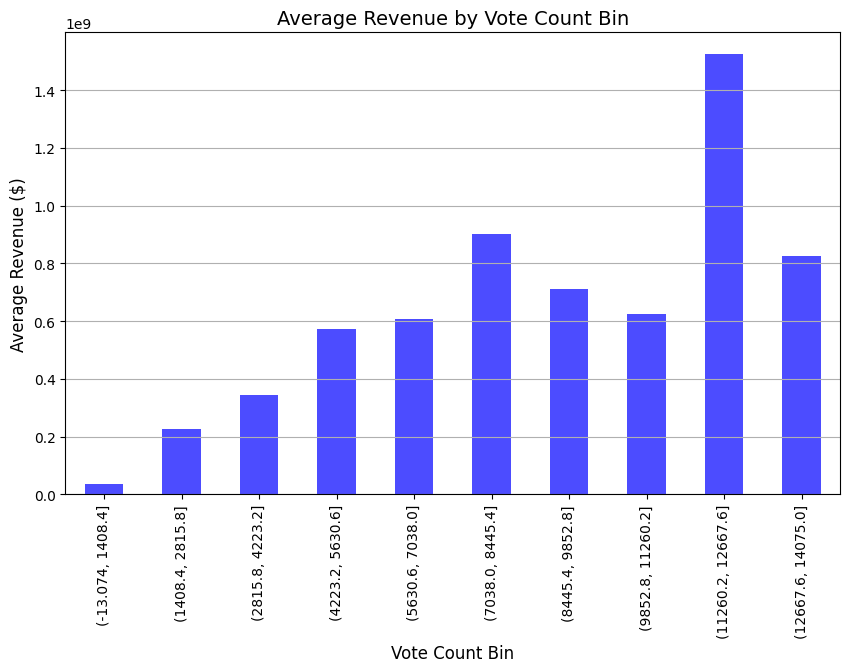

In [26]:
data['vote_count_bin'] = pd.cut(data['vote_count'], bins=10)
binned_data = data.groupby('vote_count_bin')['revenue'].mean()

plt.figure(figsize=(10, 6))
binned_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Revenue by Vote Count Bin', fontsize=14)
plt.xlabel('Vote Count Bin', fontsize=12)
plt.ylabel('Average Revenue ($)', fontsize=12)
plt.grid(True, axis='y')
plt.show()
